[ 28.52190898   4.46264046  -0.409957  ]


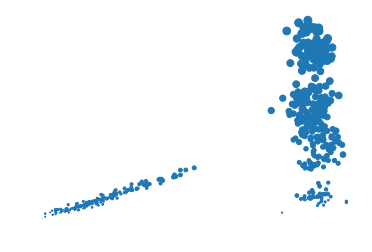

In [20]:
# PROBLEM STATEMENT 2

# Most dominant color extraction like in whatsapp dp background.
# reduce the number of color for compression
# 255,255,255
# color matching distance matrix CIELAB

# L = Lightness [ 0(Black) < L < 100(White) ]
# a = green-red [ -100(Green) < a < 100(Red) ]
# b = blue-yellow[ -100(Blue) < b < 100(Yellow)]
# CIE76_Distance = Square_root( (L2-L1)**2 + (a2-a1)**2 + (b2-b1)**2 )
# CIE76_Distance = 2.3 is just noticable difference
# same amount of numerical change in these values corresponds to about the same amount of visually perceived change.

#https://gist.github.com/bikz05/6fd21c812ef6ebac66e1
#from skimage import io, color
#rgb = io.imread(filename)
#lab = color.rgb2lab(rgb)

# k number of clusters or number of colors hence keep it variable based on number of distances 
# greater than 2.3 in space colorwise should become the k value.
# total colors = 255**3
# reduced colors as stated above the total colors

#STEPS
#load image
#extract rgb colors of image in array
#convert this rgb array to lab array
import cv2
import skimage.io as io
import skimage.color as color
import numpy as np
import matplotlib.pyplot as plt
# To change the default values
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

filename = '/home/sarthak/Pictures/1.jpg'
rgb = io.imread(filename)
lab = color.rgb2lab(rgb)
print lab[0][0]

# To improve the color matching of pixels as uniform human like perception of colors 
def lab_distance(x1,x2):
    l1,a1,b1 = x1[0],x1[1],x1[2]
    l2,a2,b2 = x2[0],x2[1],x2[2]
    return np.sqrt((l2-l1)**2 + (a1-a2)**2 + (b2-b1)**2)


# L = Lightness [ 0(Black) < L < 100(White) ]
# a = green-red [ -100(Green) < a < 100(Red) ]
# b = blue-yellow[ -100(Blue) < b < 100(Yellow)]
# CIE76_Distance = Square_root( (L2-L1)**2 + (a2-a1)**2 + (b2-b1)**2 )
# CIE76_Distance = 2.3 is just noticable difference

# plt.figure(1)
# plt.imshow(lab)

plt.scatter(lab[:,0],lab[:,1],lab[:,2])
plt.figure(1)
plt.show()

(245000, 3)


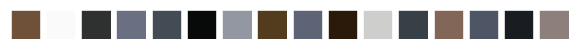

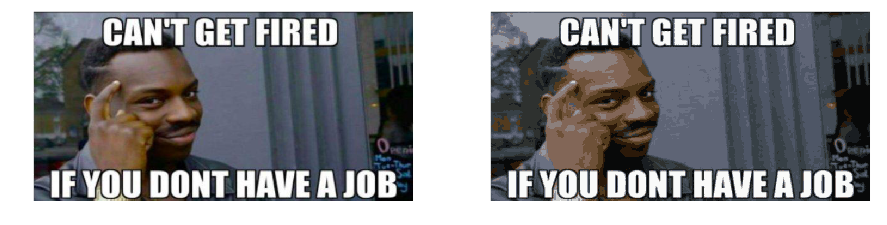

In [93]:
# DOMINANT COLOUR EXTRACTION AND IMAGE COMPRESSION REGENERATION
import numpy as np 
import cv2
import skimage.io as io
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans

im = io.imread('/home/sarthak/Pictures/1.jpg')
im = cv2.resize(im,(700,350))

data = im.reshape((-1,3))
print data.shape

# K Mean Clustering applied on the colors to group colours with similar cluster centers
km = KMeans(n_clusters=16)
km.fit(data)

dominant_colors = km.cluster_centers_.astype(np.uint8)
plt.figure(0,figsize=(10,10))

for cx in range(dominant_colors.shape[0]):
    plt.subplot(1, dominant_colors.shape[0], cx + 1)
    plt.xticks([])
    plt.yticks([])
    col = np.zeros((50,50,3), dtype=np.uint8)
    col[:, :, :] = dominant_colors[cx]
    plt.imshow(col)

new_img = np.zeros_like(data)
labels = km.predict(data)
#print np.unique(labels,return_counts=True)

for ix in range(new_img.shape[0]):
    new_img[ix,:] = dominant_colors[labels[ix]]

plt.figure(1,figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im)

plt.subplot(1,2,2)
plt.imshow(new_img.reshape(im.shape))